<a href="https://colab.research.google.com/github/KayalvizhiT513/Eigen-Values-and-Vectors/blob/main/Diagonalization_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def plot_graph(P, D, P1, x):
    start = (0,0)

    # Define ending points for arrows
    # setting column vectors as basis
    end_b1 = P.T[0]       # (2, -1)
    end_b2 = P.T[1]       # (1, 1)

    x_on_b = P1@x                                     # (1/3, 4/3)
    stretched_x = D@P1@x                              # (1, 8)
    std_stretched_x = P@D@P1@x                        # (10, 7)
    std_stretched_x_along_b2 = end_b2*stretched_x[1]  # (8, 8)
    std_stretched_x_along_b1 = end_b1*stretched_x[0]  # (2, -1)
    x_along_b2 = end_b2*x_on_b[1]
    x_along_b1 = end_b1*x_on_b[0]

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot arrows
    b2_positive_axis = ax.plot([std_stretched_x_along_b2[0]-0.3,15*end_b2[0]], [std_stretched_x_along_b2[1]-0.3,15*end_b2[1]], color='gray')
    b2_negative_axis = ax.plot([0,-11*end_b2[0]], [0,-11*end_b2[1]], color='gray')
    b1_positive_axis = ax.plot([end_b1[0]-start[0]-0.3, 10*end_b1[0]], [end_b1[1]-start[1]+0.03,10*end_b1[1]], color='gray')
    b1_negative_axis = ax.plot([0,-4*end_b1[0]], [0,-4*end_b1[1]], color='gray')

    line_to_stretched_x_along_b2 = ax.plot([std_stretched_x_along_b2[0],std_stretched_x[0]], [std_stretched_x_along_b2[1],std_stretched_x[1]], color='black')
    line_to_stretched_x_along_b1 = ax.plot([std_stretched_x_along_b1[0],std_stretched_x[0]], [std_stretched_x_along_b1[1],std_stretched_x[1]], color='black')

    basis1_arrow = ax.arrow(*start, end_b1[0]-start[0]-0.3, end_b1[1]-start[1]+0.03, head_width=0.3, head_length=0.3, fc='red', ec='red')
    basis2_arrow = ax.arrow(*start, end_b2[0]-start[0]-0.3, end_b2[1]-start[1]-0.3, head_width=0.3, head_length=0.3, fc='red', ec='red')
    point_b1 = ax.scatter(end_b1[0], end_b1[1], color='blue')
    point_b2 = ax.scatter(end_b2[0], end_b2[1], color='blue')
    point_x = ax.scatter(x[0], x[1], color='blue')
    point_stretched_x = ax.scatter(std_stretched_x[0], std_stretched_x[1], color='blue')
    arrow_on_b2 = ax.arrow(*(end_b2[0], end_b2[1]), std_stretched_x_along_b2[0]-end_b2[0]-0.3, std_stretched_x_along_b2[1]-end_b2[1]-0.3, head_width=0.3, head_length=0.3, fc='green', ec='green')

    line_to_x_along_b1 = ax.arrow(*(x_along_b1[0], x_along_b1[1]), x[0]-(x_along_b1[0]), x[1]-(x_along_b1[1]), head_width=0, head_length=0, fc='black', ec='black', linestyle='dotted')
    line_to_x_along_b2 = ax.arrow(*(x_along_b2[0], x_along_b2[1]), x[0]-(x_along_b2[0]), x[1]-(x_along_b2[1]), head_width=0, head_length=0, fc='black', ec='black', linestyle='dotted')

    # Add labels near the arrow heads
    ax.annotate(f'b1 = {end_b1}', xy=(end_b1[0]+1, end_b1[1]-1.01), xytext=(-20, 15), textcoords='offset points')
    ax.annotate(f'b2 = {end_b2}', xy=(end_b2[0]-1, end_b2[1]-0.5), xytext=(-20, 15), textcoords='offset points')
    ax.annotate(f'x = {x}; B-Coords are {np.round(x_on_b,2)}', xy=(x[0], x[1]), xytext=(5, -5), textcoords='offset points')
    ax.annotate(f'{stretched_x} in B-Coords\n {std_stretched_x} in std-Coords', xy=(std_stretched_x[0], std_stretched_x[1]), xytext=(5, -5), textcoords='offset points')

    # Set limits and labels
    ax.set_xlim(-5, 15)
    ax.set_ylim(-5, 15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Show plot
    plt.grid()
    plt.show()

In [30]:
def diagonalize(A):
  # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)

    # Construct the diagonal matrix D
    D = np.diag(eigenvalues)

    #adjusting the columns of P
    mult1 = -1/eigenvectors.T[0][1]
    vect1 = mult1*eigenvectors.T[0]
    mult2 = 1/eigenvectors.T[1][1]
    vect2 = mult2*eigenvectors.T[1]

    # Stack the eigenvectors as columns to form the matrix P
    P = np.column_stack((vect1, vect2))
    P_inv = np.linalg.inv(P)

    return P, D, P_inv

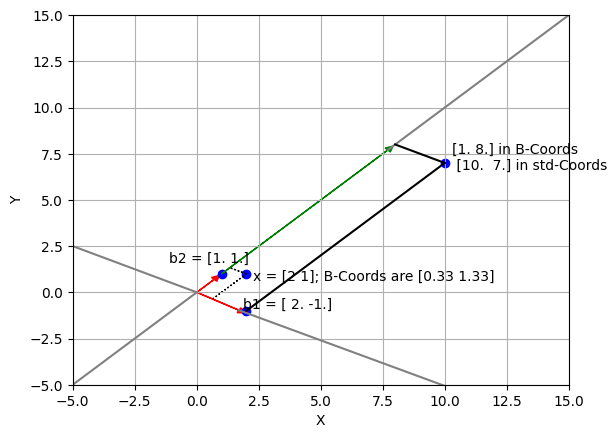

In [31]:
A = np.array([[4, 2],
              [1, 5]])

P, D, P1 = diagonalize(A)

x = np.array([2, 1])

plot_graph(P, D, P1, x)

In [24]:
print(P)

[[ 2.  1.]
 [-1.  1.]]


In [13]:
print(D)

[[3. 0.]
 [0. 6.]]


In [14]:
print(P1)

[[ 0.33333333 -0.33333333]
 [ 0.33333333  0.66666667]]


In [27]:
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigen values: ",eigenvalues)
print("Eigen vectors: \n",eigenvectors)


Eigen values:  [3. 6.]
Eigen vectors: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


In [32]:
P@D@P1

array([[4., 2.],
       [1., 5.]])